In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [3]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [4]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [5]:
# Step 2: Characterization
print("Characterization:")
print(X.describe())

Characterization:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      

1. Data Quality: Common Problems
Based on the information you've provided (histograms, boxplots, code snippet), some potential data quality problems in your dataset could be:

Missing values: The presence of "NaN" values in the code snippet suggests missing data in some features.
Outliers: Boxplots might have revealed outliers in features like "thalach" and "oldpeak."
Inconsistent formatting: The data might have inconsistencies in formatting, especially if collected from various sources.
2. Exploratory Data Analysis (EDA): Observations
Distribution: Features like "thalach" appear right-skewed, while "chol" looks more symmetrical based on the boxplot.
Variability: The boxplot suggests varying distributions across features, indicating potential differences in data characteristics.
Outliers: The presence of outliers in some features, as seen in the boxplot, could require further investigation.
3. Anomaly Detection
Extreme values: Outliers observed in the boxplot could be potential anomalies requiring examination.
Data inconsistencies: Inconsistent values within a feature compared to the expected range could be anomalies.
4. Summary Statistics
Assuming the code snippet provides summary statistics:

The code snippet likely shows:

Number of non-null values: This indicates how many data points are available for analysis in each feature.
Central tendency: Measures like mean and median give an idea of the "center" of the data distribution for each feature.
Spread: Measures like standard deviation and interquartile range (IQR) show the variability of data points around the central tendency.

In [6]:
X_df = X

In [7]:
# Add the target variable as a column to the DataFrame
X_df['target'] = y

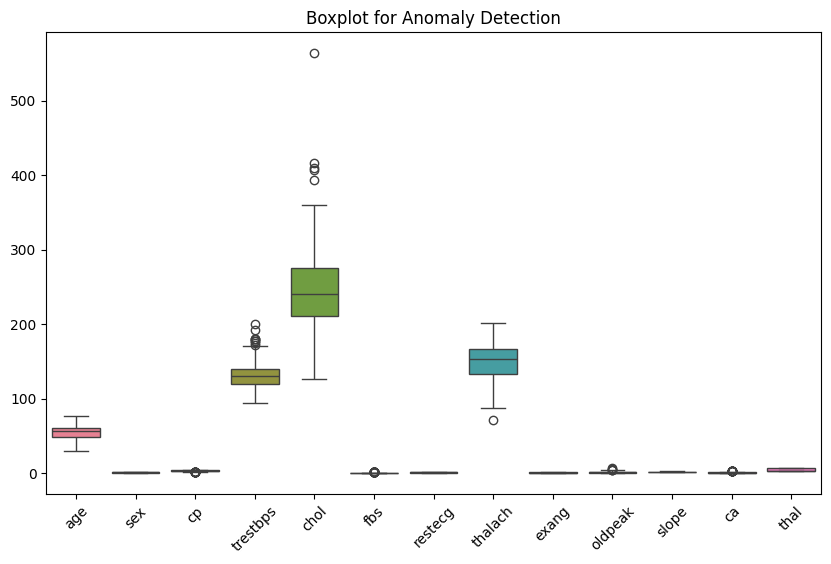

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Anomaly detection
# Detecting anomalies using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_df.drop(columns='target'))
plt.title('Boxplot for Anomaly Detection')
plt.xticks(rotation=45)
plt.show()

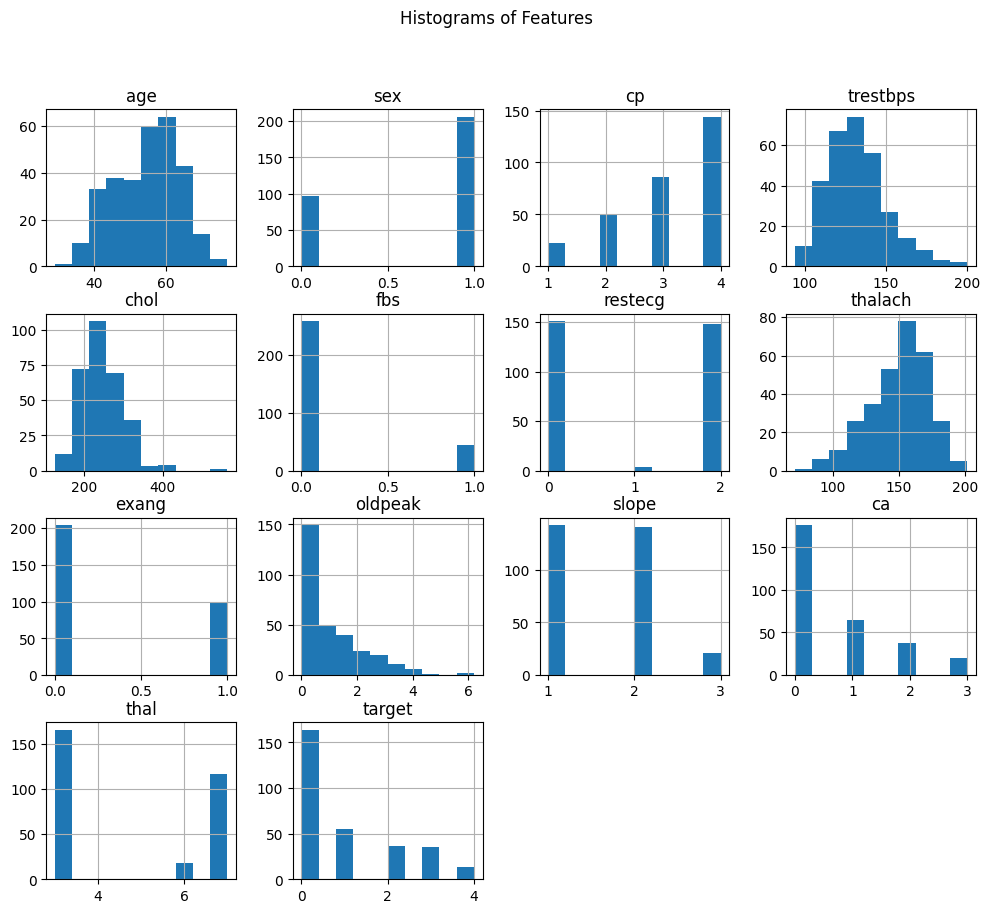

In [9]:
# 2. Data Visualization
# Histograms
X_df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Features')
plt.show()

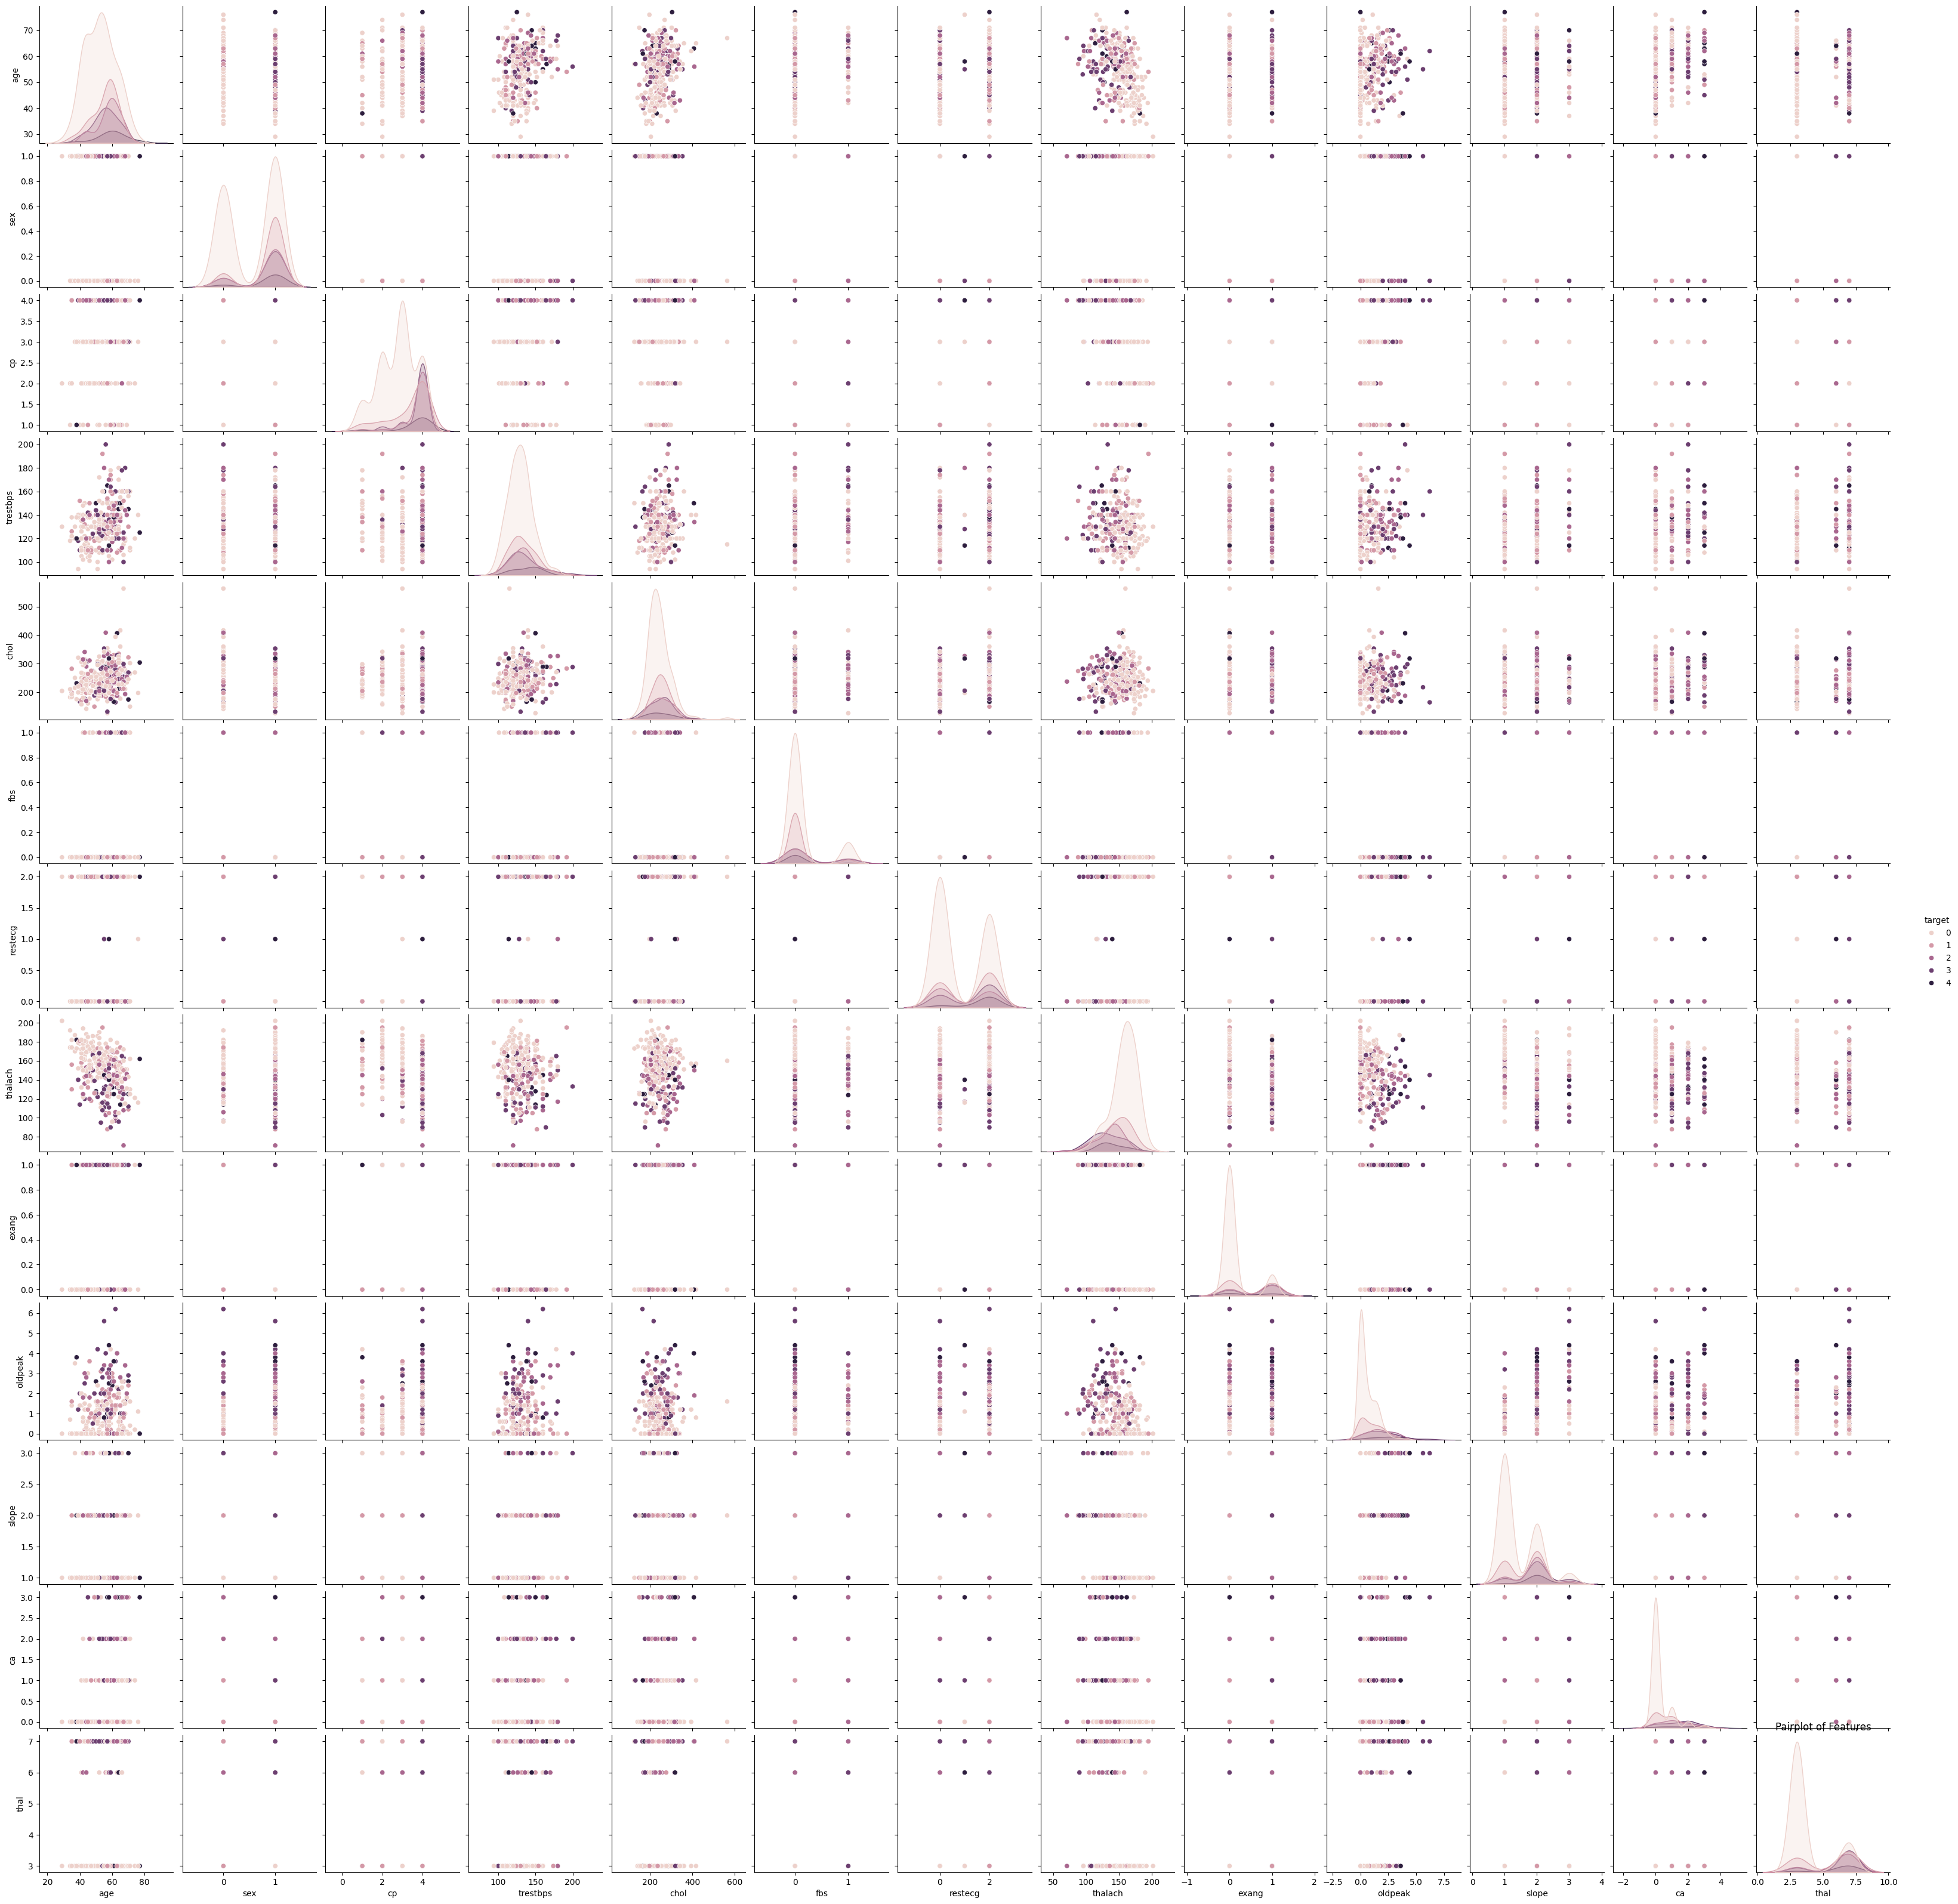

In [10]:
# Scatter plots
sns.pairplot(data=X_df, hue='target')
plt.title('Pairplot of Features')
plt.show()

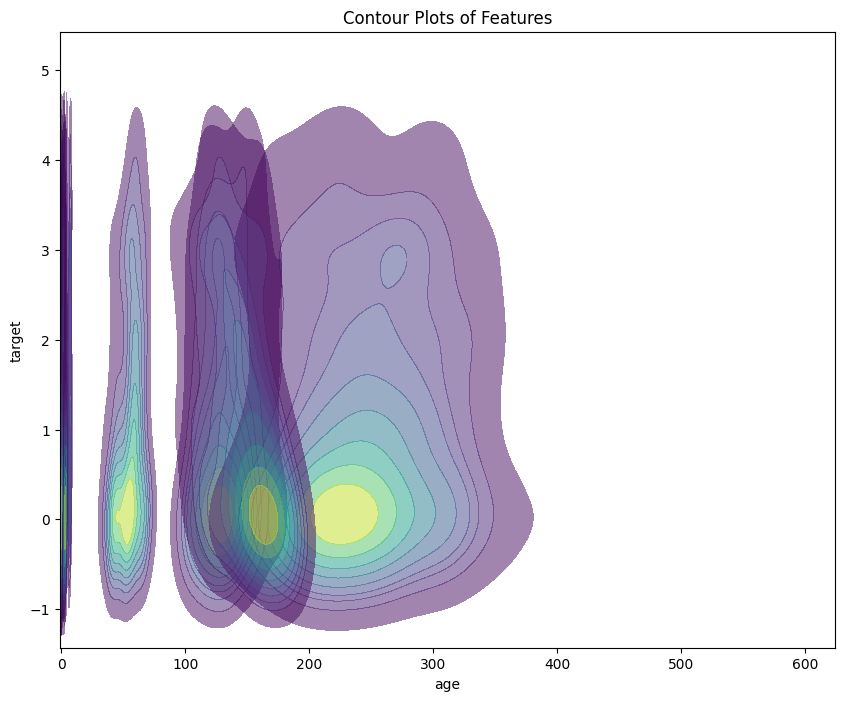

In [11]:
# Contour plots
plt.figure(figsize=(10, 8))
for feature in X_df.columns[:-1]:
    sns.kdeplot(data=X_df, x=feature, y='target', fill=True, cmap='viridis', alpha=0.5)
plt.title('Contour Plots of Features')
plt.show()

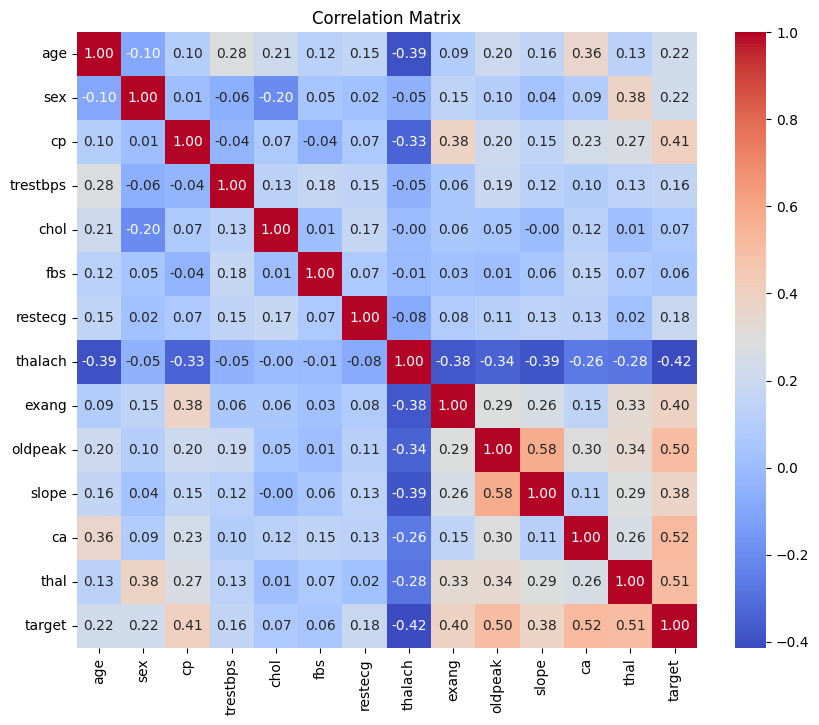

In [12]:
# Matrix plots
plt.figure(figsize=(10, 8))
sns.heatmap(X_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Step 3: Classification
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
import numpy as np

In [16]:
class NearestNeighborClassifierManual:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
      predictions = []
      for x_test in X_test:
        distances = np.sqrt(np.sum((self.X_train - x_test) ** 2, axis=1))
        nearest_neighbor_index = np.argmin(distances)
        predictions.append(self.y_train[nearest_neighbor_index])
      return np.array(predictions)


In [17]:
# Import GaussianNaiveBayesClassifierManual
class GaussianNaiveBayesClassifierManual:
    def __init__(self):
        self.class_priors = None
        self.class_means = None
        self.class_variances = None

    def fit(self, X_train, y_train):
      self.class_priors = {}
      self.class_means = {}
      self.class_variances = {}
      classes = np.unique(y_train)
      for c in classes:

        self.class_priors[c] = np.mean(y_train == c)

        self.class_means[c] = np.mean(X_train[y_train == c], axis=0)
        self.class_variances[c] = np.var(X_train[y_train == c], axis=0)

    def predict(self, X_test):
      predictions = []
      for x_test in X_test:
        posteriors = []
        for c in self.class_priors:

            likelihood = np.prod(
                (1 / np.sqrt(2 * np.pi * self.class_variances[c])) *
                np.exp(-0.5 * ((x_test - self.class_means[c]) ** 2) / self.class_variances[c])
            )

            posterior = self.class_priors[c] * likelihood
            posteriors.append(posterior)

        predictions.append(np.argmax(posteriors))
      return np.array(predictions)

In [18]:
class SupportVectorMachineClassifierManual:
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.epochs):
            for idx, x in enumerate(X_train):
                y = y_train[idx]
                condition = y * (np.dot(x, self.weights) - self.bias) >= 1
                if not condition:
                    self.weights -= self.learning_rate * (2 * 1/self.epochs * self.weights)
                    self.weights += self.learning_rate * (x * y)
                    self.bias += self.learning_rate * y

    def predict(self, X_test):
      return np.sign(np.dot(X_test, self.weights) - self.bias)

In [19]:
class ConfusionMatrix:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.n_classes = len(np.unique(y_true))
        self.matrix = self._compute_confusion_matrix()

    def _compute_confusion_matrix(self):
        matrix = np.zeros((self.n_classes, self.n_classes), dtype=int)
        clean_true = np.nan_to_num(self.y_true, nan=-1)  # Convert NaN to -1
        clean_pred = np.nan_to_num(self.y_pred, nan=-1)  # Convert NaN to -1
        for true, pred in zip(clean_true, clean_pred):
            matrix[int(true), int(pred)] += 1
        return matrix


    def plot(self):
        plt.figure(figsize=(8, 6))
        sns.heatmap(self.matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.arange(self.n_classes), yticklabels=np.arange(self.n_classes))
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()

In [21]:
class EvaluationMetrics:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.confusion_matrix = ConfusionMatrix(y_true, y_pred)
        self.confusion_matrix.plot()
        self.metrics = self._compute_metrics()

    def _compute_metrics(self):
      tp = np.diag(self.confusion_matrix.matrix)
      fp = np.sum(self.confusion_matrix.matrix, axis=0) - tp
      fn = np.sum(self.confusion_matrix.matrix, axis=1) - tp
      tn = np.sum(self.confusion_matrix.matrix) - (tp + fp + fn)

      sensitivity = np.divide(tp, (tp + fn), where=(tp + fn) != 0)
      specificity = np.divide(tn, (tn + fp), where=(tn + fp) != 0)
      fpr = np.divide(fp, (tn + fp), where=(tn + fp) != 0)
      fnr = np.divide(fn, (tp + fn), where=(tp + fn) != 0)

      precision = np.divide(tp, (tp + fp), where=(tp + fp) != 0)
      recall = np.divide(tp, (tp + fn), where=(tp + fn) != 0)

      f1_score_denom = precision + recall
      f1_score = np.divide(2 * (precision * recall), f1_score_denom, where=f1_score_denom != 0, out=np.zeros_like(f1_score_denom))

      return {
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'FPR': fpr,
            'FNR': fnr,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score
        }

<ipython-input-19-616b29efea4a>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  matrix[int(true), int(pred)] += 1


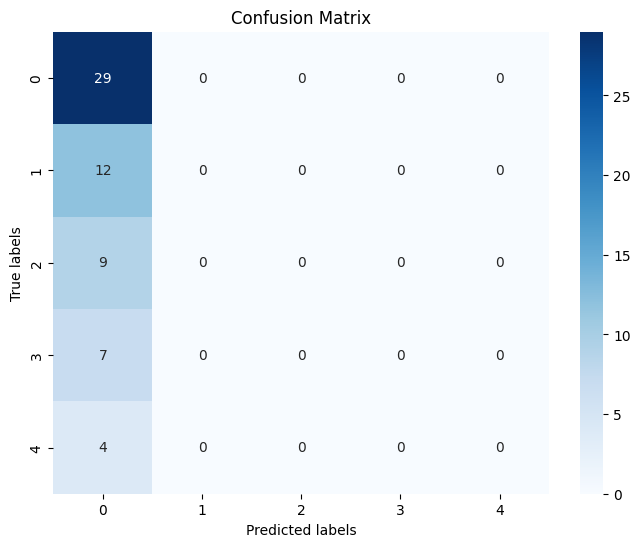

<ipython-input-17-8bf6ded9216d>:27: RuntimeWarning: divide by zero encountered in divide
  (1 / np.sqrt(2 * np.pi * self.class_variances[c])) *
<ipython-input-17-8bf6ded9216d>:28: RuntimeWarning: divide by zero encountered in divide
  np.exp(-0.5 * ((x_test - self.class_means[c]) ** 2) / self.class_variances[c])
<ipython-input-17-8bf6ded9216d>:27: RuntimeWarning: invalid value encountered in multiply
  (1 / np.sqrt(2 * np.pi * self.class_variances[c])) *
<ipython-input-17-8bf6ded9216d>:28: RuntimeWarning: invalid value encountered in divide
  np.exp(-0.5 * ((x_test - self.class_means[c]) ** 2) / self.class_variances[c])


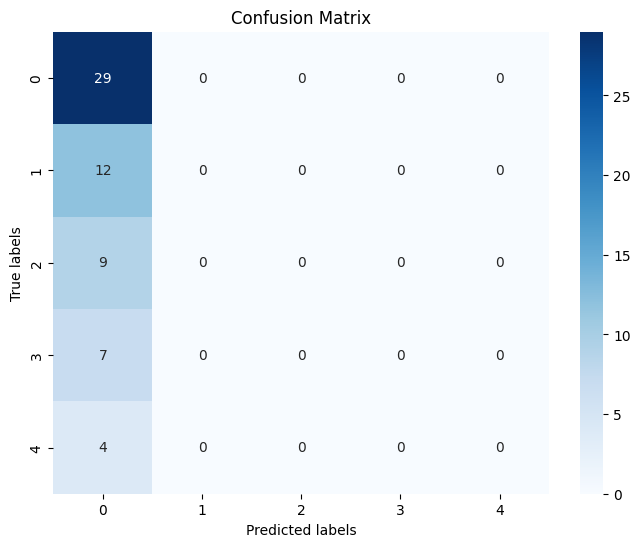

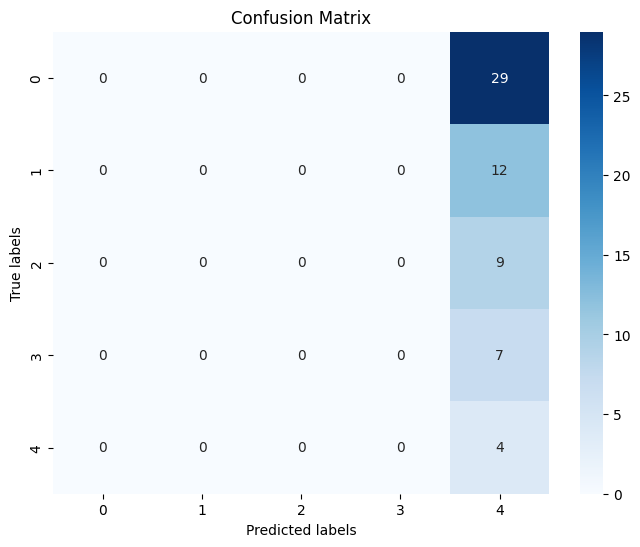

In [23]:
#Write a main to test all the above functions
def main():

  heart_disease = fetch_ucirepo(id=45)
  X = heart_disease.data.features
  y = heart_disease.data.targets

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  ##
  NNR=NearestNeighborClassifierManual()
  NNR.fit(X_train.to_numpy(),y_train.to_numpy())
  predicted_labels1=NNR.predict(X_test.to_numpy())

  evaluation_matrix=EvaluationMetrics(y_test.to_numpy().flatten(),predicted_labels1)

  ##
  GBNC=GaussianNaiveBayesClassifierManual()
  GBNC.fit(X_train.to_numpy(),y_train.to_numpy().flatten())
  predicted_labels2=GBNC.predict(X_test.to_numpy())

  evaluation_matrix=EvaluationMetrics(y_test.to_numpy().flatten(),predicted_labels2)


    ##
  SVM=SupportVectorMachineClassifierManual()
  SVM.fit(X_train.to_numpy(),y_train.to_numpy().flatten())
  predict_labels3=SVM.predict(X_test.to_numpy())

  evaluation_matrix=EvaluationMetrics(y_test.to_numpy().flatten(),predict_labels3)
  print(evaluation_matrix)

if __name__=='__main__':
  main()